In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Wczytaj dane
dt = pd.read_csv('AOS_data.csv', usecols=['open', 'high', 'low', 'close', 'volume'])

# Wybierz ilość próbek do przewidywania
K = 500
Procent = K/len(dt)*100
print("Procent przewidywanych próbek: %.2f" % (Procent)) 

# Dodaj kolumnę z przewidywaniami (wartości przesunięte o K wierszy w dół)
dt['prediction'] = dt['open'].shift(-K)

# Przygotuj dane wejściowe
X = np.array(dt.drop(['prediction'], 1))
X = StandardScaler().fit_transform(X)
X_dni = X[-K:]
X = X[:-K]

# Przygotuj dane wyjściowe
y = np.array(dt['prediction'])
y = y[:-K]

# Podziel dane na zbiór trenujący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Utwórz model MLP i przeprowadź proces uczenia z użyciem Grid Search
mlp = MLPRegressor(random_state=1, max_iter=500)
parametry = {
    'learning_rate_init': [0.1, 0.01, 0.001], 
    'hidden_layer_sizes': [20, 40, 60, 80, 100], 
    'solver': ['adam', 'lbfgs', 'sgd'], 
    'learning_rate': ['constant', 'adaptive']
}
clf = GridSearchCV(mlp, parametry)
clf.fit(X_train, y_train)
print("Best params: ", clf.best_params_)

# Przygotuj model MLP z optymalnymi parametrami i przeprowadź uczenie
mlp = MLPRegressor(
    random_state=1, 
    max_iter=500, 
    hidden_layer_sizes=clf.best_params_['hidden_layer_sizes'], 
    learning_rate=clf.best_params_['learning_rate'],
    learning_rate_init=clf.best_params_['learning_rate_init'],
    solver=clf.best_params_['solver'], 
    activation='relu'
)
mlp.fit(X_train, y_train)

# Oceń dokładność modelu
print("Dokladność (train): ", mlp.score(X_train, y_train)*100, '%')
print("Dokladność (test): ", mlp.score(X_test, y_test)*100, '%')

# Dokonaj predykcji na kolejnych K wierszach
prediction_dni = mlp.predict(X_dni)
print("Predykcje dla kolejnych K wierszy: ", prediction_dni)


Procent przewidywanych próbek: 39.71
Best params:  {'hidden_layer_sizes': 60, 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'solver': 'sgd'}
Dokladność (train):  83.09124352179931 %
Dokladność (test):  86.63311396054185 %
Predykcje dla kolejnych K wierszy:  [ 57.72270263  57.20183817  55.80428429  56.09266682  56.07712516
  55.54162299  55.86180091  57.28992514  57.86933598  58.88635753
  56.07165349  56.50177441  57.41368468  59.64544437  57.90215853
  58.47289387  58.27697969  57.40601827  58.50867989  57.21888802
  56.41838915  56.26232381  58.62393536  60.49205496  58.97645814
  58.3562682   58.86430027  58.93249651  57.83276745  59.56388534
  59.5962025   59.67111457  59.82374711  60.22485229  59.75852513
  60.21391845  60.44517544  59.60852234  59.67013201  59.03726876
  60.64672525  61.29923533  61.06129568  61.34867868  61.44617798
  61.27313564  61.61082353  61.28721531  61.42145653  61.55695134
  62.94722475  61.07975655  60.9243698   60.20388293  60.64349203
  59.

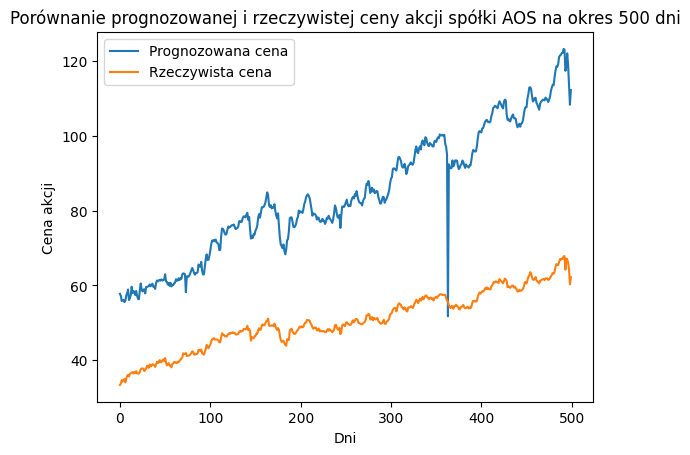

In [32]:
# rysowanie wykresu prognozowanej ceny akcji
plt.plot(prediction_dni, label='Prognozowana cena')

# rysowanie wykresu rzeczywistej ceny akcji
plt.plot(np.array(dt['open'])[-K:], label='Rzeczywista cena')

# dodanie opisu osi x
plt.xlabel('Dni')

# dodanie opisu osi y
plt.ylabel('Cena akcji')

# dodanie tytułu wykresu
plt.title('Porównanie prognozowanej i rzeczywistej ceny akcji spółki AOS na okres 500 dni')

# dodanie legendy
plt.legend()

# wyświetlenie wykresu
plt.show()